In [2]:
import pandas as pd
df = pd.read_csv("emplyee_datapra.csv")
df

,emp_id,name,department,experience,salary,performance,joining_date
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15
1,102,Riya,HR,3,45000.0,Good,2021-03-10
2,103,Rahul,IT,7,NaN,Excellent,2018-01-20
3,104,Pooja,Sales,2,30000.0,Average,2022-07-05
4,105,Ankit,Sales,4,38000.0,Good,2020-11-11
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30


In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emp_id        6 non-null      int64  
 1   name          6 non-null      object 
 2   department    6 non-null      object 
 3   experience    6 non-null      int64  
 4   salary        5 non-null      float64
 5   performance   6 non-null      object 
 6   joining_date  6 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 468.0+ bytes


,emp_id,experience,salary
count,6.000000,6.000000,5.000000
mean,103.500000,4.500000,45000.000000
std,1.870829,1.870829,11704.699911
min,101.000000,2.000000,30000.000000
25%,102.250000,3.250000,38000.000000
50%,103.500000,4.500000,45000.000000
75%,104.750000,5.750000,52000.000000
max,106.000000,7.000000,60000.000000


In [4]:
df.isnull().sum()

emp_id          0
name            0
department      0
experience      0
salary          1
performance     0
joining_date    0
dtype: int64

In [5]:
df["salary"] = df.groupby("department")["salary"].transform(
    lambda x : x.fillna(x.mean())
)

In [18]:
df

,emp_id,name,department,experience,salary,performance,joining_date
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15
1,102,Riya,HR,3,45000.0,Good,2021-03-10
2,103,Rahul,IT,7,60000.0,Excellent,2018-01-20
3,104,Pooja,Sales,2,30000.0,Average,2022-07-05
4,105,Ankit,Sales,4,38000.0,Good,2020-11-11
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30


In [6]:
df["bonus_rate"] = df["performance"].apply(
    lambda x : 0.20 if x == "Excellent" else(0.10 if x=="Good" else 0.05) 
)

df["bonus_amount"] = df["salary"] * df["bonus_rate"]

In [7]:
dept_summary = df.groupby("department").agg({
    "salary":"mean",
    "bonus_rate":"mean",
    "emp_id":"count"
})

dept_summary

,salary,bonus_rate,emp_id
department,,,
HR,48500.0,0.150,2
IT,60000.0,0.200,2
Sales,34000.0,0.075,2


In [8]:
df

,emp_id,name,department,experience,salary,performance,joining_date,bonus_rate,bonus_amount
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15,0.20,12000.0
1,102,Riya,HR,3,45000.0,Good,2021-03-10,0.10,4500.0
2,103,Rahul,IT,7,60000.0,Excellent,2018-01-20,0.20,12000.0
3,104,Pooja,Sales,2,30000.0,Average,2022-07-05,0.05,1500.0
4,105,Ankit,Sales,4,38000.0,Good,2020-11-11,0.10,3800.0
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30,0.20,10400.0


In [9]:
df["joining_data"] = pd.to_datetime(df["joining_date"])
df["joining_year"] = df["joining_data"].dt.year

In [10]:
df

,emp_id,name,department,experience,salary,performance,joining_date,bonus_rate,bonus_amount,joining_data,joining_year
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15,0.20,12000.0,2019-06-15,2019
1,102,Riya,HR,3,45000.0,Good,2021-03-10,0.10,4500.0,2021-03-10,2021
2,103,Rahul,IT,7,60000.0,Excellent,2018-01-20,0.20,12000.0,2018-01-20,2018
3,104,Pooja,Sales,2,30000.0,Average,2022-07-05,0.05,1500.0,2022-07-05,2022
4,105,Ankit,Sales,4,38000.0,Good,2020-11-11,0.10,3800.0,2020-11-11,2020
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30,0.20,10400.0,2017-09-30,2017


In [11]:
top_paid = df.sort_values("salary" , ascending=False).head(3)
top_paid

,emp_id,name,department,experience,salary,performance,joining_date,bonus_rate,bonus_amount,joining_data,joining_year
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15,0.2,12000.0,2019-06-15,2019
2,103,Rahul,IT,7,60000.0,Excellent,2018-01-20,0.2,12000.0,2018-01-20,2018
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30,0.2,10400.0,2017-09-30,2017


In [13]:
df.to_csv("data_pandas_emplyee.csv", index=False)

In [35]:
df

,emp_id,name,department,experience,salary,performance,joining_date,bonus_rate,bonus_amount,joining_data,joining_year
0,101,Amit,IT,5,60000.0,Excellent,2019-06-15,0.20,12000.0,2019-06-15,2019
1,102,Riya,HR,3,45000.0,Good,2021-03-10,0.10,4500.0,2021-03-10,2021
2,103,Rahul,IT,7,60000.0,Excellent,2018-01-20,0.20,12000.0,2018-01-20,2018
3,104,Pooja,Sales,2,30000.0,Average,2022-07-05,0.05,1500.0,2022-07-05,2022
4,105,Ankit,Sales,4,38000.0,Good,2020-11-11,0.10,3800.0,2020-11-11,2020
5,106,Neha,HR,6,52000.0,Excellent,2017-09-30,0.20,10400.0,2017-09-30,2017


In [14]:
# Seaborn plots (Peofersional Look)
import seaborn as sns


<Axes: xlabel='experience', ylabel='salary'>

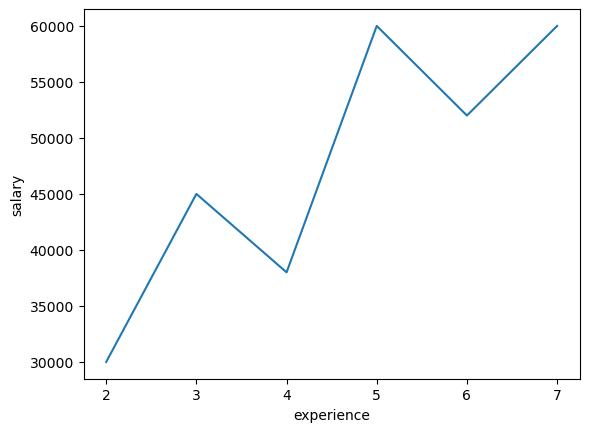

In [15]:
# Line plot
sns.lineplot(x="experience",y="salary",data=df)

<Axes: xlabel='department', ylabel='salary'>

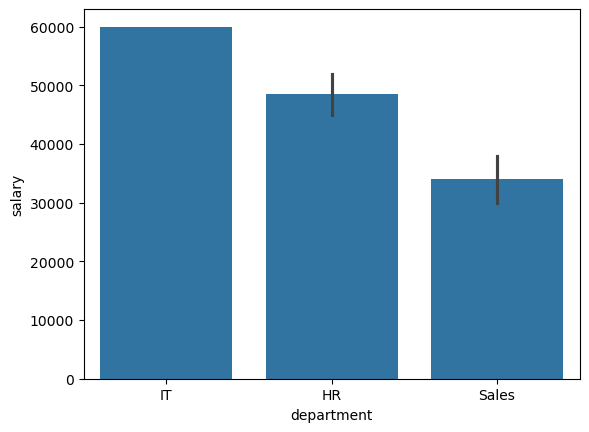

In [16]:
# Bar Plot
sns.barplot(x="department",y="salary",data=df)

<Axes: xlabel='department', ylabel='salary'>

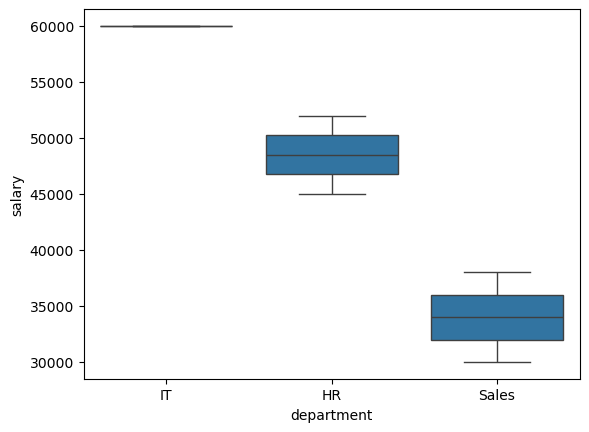

In [17]:
# Box Plot
sns.boxplot(x="department",y="salary",data=df)

<Axes: xlabel='experience', ylabel='salary'>

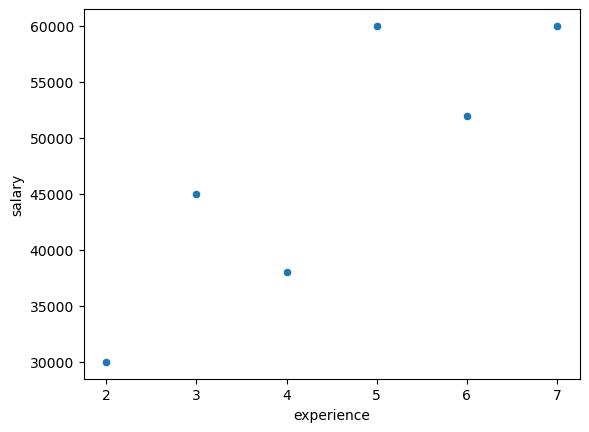

In [18]:
# Scatter Plot
sns.scatterplot(x="experience",y="salary",data=df)

<Axes: xlabel='department', ylabel='count'>

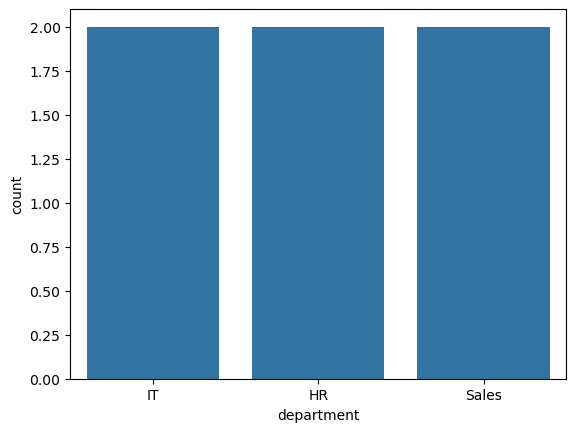

In [21]:
# Count Plot
sns.countplot(x="department",data=df)

<Axes: xlabel='department', ylabel='salary'>

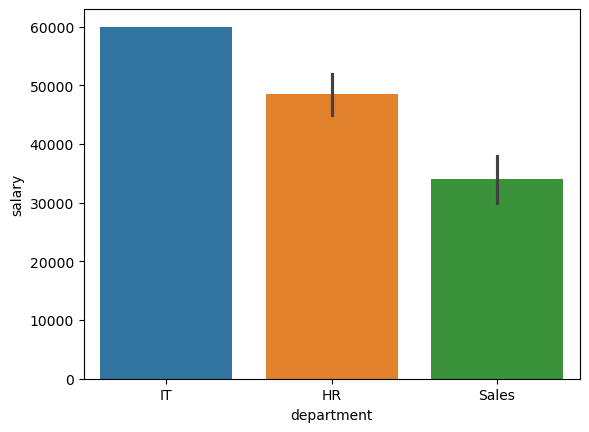

In [22]:
sns.barplot(x="department",y="salary",data=df,hue="department")